In [ ]:
import os

def rename_images_in_subfolders(parent_folder_path):
    # Get a list of all subfolders in the parent folder
    subfolders = [f.path for f in os.scandir(parent_folder_path) if f.is_dir()]
    
    for subfolder in subfolders:
        # Get the name of the subfolder
        subfolder_name = os.path.basename(subfolder)
        
        # Get a list of all files in the subfolder
        files = os.listdir(subfolder)
        
        # Filter out non-image files (optional)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        
        # Sort the files to ensure consistent ordering
        image_files.sort()
        
        # Rename each image file
        for i, filename in enumerate(image_files):
            # Create the new filename with 12 digits
            new_filename = f"{subfolder_name}_{i+1:012}.png"
            
            # Get the full path to the old and new files
            old_file = os.path.join(subfolder, filename)
            new_file = os.path.join(subfolder, new_filename)
            
            # Rename the file
            os.rename(old_file, new_file)
            print(f"Renamed {old_file} to {new_file}")

# Example usage
parent_folder_path = 'path'
rename_images_in_subfolders(parent_folder_path)

Renamed C:\Users\Acer\OneDrive\Desktop\NCKH\Dataset\ViVQA4Edu\Education\Education_000000000001.png to C:\Users\Acer\OneDrive\Desktop\NCKH\Dataset\ViVQA4Edu\Education\Education_000000000001.png
Renamed C:\Users\Acer\OneDrive\Desktop\NCKH\Dataset\ViVQA4Edu\Education\Education_000000000002.png to C:\Users\Acer\OneDrive\Desktop\NCKH\Dataset\ViVQA4Edu\Education\Education_000000000002.png
Renamed C:\Users\Acer\OneDrive\Desktop\NCKH\Dataset\ViVQA4Edu\Education\Education_000000000003.png to C:\Users\Acer\OneDrive\Desktop\NCKH\Dataset\ViVQA4Edu\Education\Education_000000000003.png
Renamed C:\Users\Acer\OneDrive\Desktop\NCKH\Dataset\ViVQA4Edu\Education\Education_000000000004.png to C:\Users\Acer\OneDrive\Desktop\NCKH\Dataset\ViVQA4Edu\Education\Education_000000000004.png
Renamed C:\Users\Acer\OneDrive\Desktop\NCKH\Dataset\ViVQA4Edu\Education\Education_000000000005.png to C:\Users\Acer\OneDrive\Desktop\NCKH\Dataset\ViVQA4Edu\Education\Education_000000000005.png
Renamed C:\Users\Acer\OneDrive\Desk

In [ ]:
import pandas as pd
import os


df = pd.read_csv('path')
df

,ImageID,Question,Num_Ques,Answer,Num_Ans
0,Education_000000000001,['Câu hỏi 1: Cô giáo trong ảnh đang mặc trang ...,5,['Câu hỏi 1: Cô giáo trong ảnh đang mặc áo dài...,5
1,Education_000000000002,['Câu hỏi 1: Cô bé trên sân khấu đang làm gì?'...,5,"['Câu hỏi 1: Cô bé trên sân khấu đang hát.', '...",5
2,Education_000000000003,['Câu hỏi 1: Các học sinh đang làm gì trong lớ...,5,['Câu hỏi 1: Các học sinh đang làm bài kiểm tr...,5
3,Education_000000000004,"['Câu hỏi 1: Cô bé đang nói về nghề gì?', 'Câu...",3,['Câu hỏi 1: Cô bé đang nói về nghề cảnh sát p...,3
4,Education_000000000005,['Câu hỏi 1: Người phụ nữ trong ảnh đang làm g...,5,['Câu hỏi 1: Người phụ nữ đang phát biểu trước...,5
...,...,...,...,...,...
95,Education_000000000096,['Câu hỏi 1: Cậu bé trong ảnh đang mặc trang p...,4,['Câu hỏi 1: Cậu bé trong ảnh đang mặc trang p...,4
96,Education_000000000097,"['Câu hỏi 1: Cậu bé trong ảnh đang làm gì?', '...",4,['Câu hỏi 1: Cậu bé trong ảnh đang chơi đá bón...,4
97,Education_000000000098,['Câu hỏi 1: Các bạn nhỏ trong ảnh đang tham g...,5,['Câu hỏi 1: Các bạn nhỏ trong ảnh đang tham g...,5
98,Education_000000000099,['Câu hỏi 1: Các bạn nhỏ trong ảnh đang làm gì...,3,['Câu hỏi 1: Các bạn nhỏ trong ảnh đang chơi đ...,3


Question: ['Câu hỏi 1: Có bao nhiêu người trong ảnh?', 'Câu hỏi 2: Các bạn đang mặc trang phục màu gì?', 'Câu hỏi 3: Các bạn đang chơi môn thể thao gì?', 'Câu hỏi 4: Có bao nhiêu bạn đang chạm vào quả bóng?']
Answer: ['Câu hỏi 1: Có 5 người trong ảnh.', 'Câu hỏi 2: Các bạn đang mặc trang phục màu đỏ và trắng.', 'Câu hỏi 3: Tôi không biết đáp án', 'Câu hỏi 4: Có 2 bạn đang chạm vào quả bóng.']


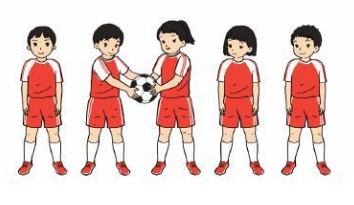

In [ ]:
from IPython.display import clear_output, display
from PIL import Image
import matplotlib.pyplot as plt
import os

root_folder = 'path'

for i in range(len(df)):
    question = df['Question'][i]
    answer = df['Answer'][i]
    
    file_name = df['ImageID'][i]
    file_name = file_name + '.png'
    
    subfolder_name = file_name.split('_')[0]
    full_path = os.path.join(root_folder, subfolder_name, file_name)
    
    print(f"Question: {question}")
    print(f"Answer: {answer}")
    # Open the image
    img = Image.open(full_path)
    # Display the image with text
    display(img)
    
    
    wait = input("PRESS ENTER TO CONTINUE.")
    clear_output(wait=True)
    